In [6]:
import pandas as pd
import numpy as n
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\dg.xlsx')
columns_to_drop = ['Name']
data.drop(columns=columns_to_drop, inplace=True)
data.info()
data2=pd.read_excel('C:\\Users\\saira\\OneDrive\\Desktop\\DigitalEye\\dgcleantest.xlsx')
columns_to_drop = ['Name']
data2.drop(columns=columns_to_drop, inplace=True)
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     300 non-null    int64
 1   Sex                                     300 non-null    int64
 2   wearables                               300 non-null    int64
 3   Duration                                300 non-null    int64
 4   onlineplatforms                         300 non-null    int64
 5   Nature                                  300 non-null    int64
 6   screenillumination                      300 non-null    int64
 7   workingyears                            300 non-null    int64
 8   hoursspentdailycurricular               300 non-null    int64
 9   hoursspentdailynoncurricular            300 non-null    int64
 10  Gadgetsused                             300 non-null    int64
 11  levelofgadjetwithre

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variables
X_train = data.drop(['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)
y_train = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Train separate models for each target variable
clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()
clf_4 = DecisionTreeClassifier()

# Train each model on the training data
clf_1.fit(X_train, y_train['Schimers1Lefteye'])
clf_2.fit(X_train, y_train['Schimers1righteye'])
clf_3.fit(X_train, y_train['Schimers2Lefteye'])
clf_4.fit(X_train, y_train['Schimers2righteye'])


DecisionTreeClassifier()

In [8]:
X_test =data2.drop(['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)
y_test = data2[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)
y_pred_4 = clf_4.predict(X_test)

# Calculate accuracy for each target variable
accuracy_1 = accuracy_score(y_test['Schimers1Lefteye'], y_pred_1)
accuracy_2 = accuracy_score(y_test['Schimers1righteye'], y_pred_2)
accuracy_3 = accuracy_score(y_test['Schimers2Lefteye'], y_pred_3)
accuracy_4 = accuracy_score(y_test['Schimers2righteye'], y_pred_4)

print("Accuracy for Schimers1Lefteye:", accuracy_1)
print("Accuracy for Schimers1righteye:", accuracy_2)
print("Accuracy for Schimers2Lefteye:", accuracy_3)
print("Accuracy for Schimers2righteye:", accuracy_4)

# Generate classification report for each target variable
report_1 = classification_report(y_test['Schimers1Lefteye'], y_pred_1)
print("Classification Report for Schimers1Lefteye:\n", report_1)

report_2 = classification_report(y_test['Schimers1righteye'], y_pred_2)
print("Classification Report for Schimers1righteye:\n", report_2)

report_3 = classification_report(y_test['Schimers2Lefteye'], y_pred_3)
print("Classification Report for Schimers2Lefteye:\n", report_3)

report_4 = classification_report(y_test['Schimers2righteye'], y_pred_4)
print("Classification Report for Schimers2righteye:\n", report_4)


Accuracy for Schimers1Lefteye: 0.0
Accuracy for Schimers1righteye: 0.0
Accuracy for Schimers2Lefteye: 0.0
Accuracy for Schimers2righteye: 0.0
Classification Report for Schimers1Lefteye:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       0.0
          12       0.00      0.00      0.00       1.0
          16       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       0.0
          22       0.00      0.00      0.00       1.0
          28       0.00      0.00      0.00       0.0
          35       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

Classification Report for Schimers1righteye:
               precision    recall  f1-score   support

       

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame containing the features
# Drop the target variables from the feature matrix
X = data.drop(['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)

# Standardize the features (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the column names
column_names = X.columns

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Sort the column names based on the explained variance ratios
sorted_column_names = [name for _, name in sorted(zip(explained_variance_ratios, column_names), reverse=True)]

# Sort the explained variance ratios
sorted_explained_variance_ratios = sorted(explained_variance_ratios, reverse=True)

# Print column names and corresponding explained variance ratios
print("Explained variance ratios with column names:")
for name, explained_variance_ratio in zip(sorted_column_names, sorted_explained_variance_ratios):
    print(f"{name}: {explained_variance_ratio:.4f}")


Explained variance ratios with column names:
Age: 0.1519
Sex: 0.1094
wearables: 0.0805
Duration: 0.0670
onlineplatforms: 0.0592
Nature: 0.0509
screenillumination: 0.0474
workingyears: 0.0440
hoursspentdailycurricular: 0.0429
hoursspentdailynoncurricular: 0.0384
Gadgetsused: 0.0360
levelofgadjetwithrespecttoeyes: 0.0334
Distancekeptbetweeneyesandgadjet: 0.0331
Avgnighttimeusageperday: 0.0308
Blinkingduringscreenusage: 0.0295
Difficultyinfocusingafterusingscreens: 0.0279
freqquencyofcomplaints: 0.0243
Severityofcomplaints: 0.0226
Ocularsymptomsobservedlately: 0.0189
Symptomsobservingatleasthalfofthetimes: 0.0186
Complaintsfrequency: 0.0174
frequencyofdryeyes: 0.0159


Feature Importances:
                                        Importance
Age                                       0.097608
Ocularsymptomsobservedlately              0.084402
Symptomsobservingatleasthalfofthetimes    0.068097
Avgnighttimeusageperday                   0.059284
wearables                                 0.053780
hoursspentdailynoncurricular              0.053658
Difficultyinfocusingafterusingscreens     0.048910
hoursspentdailycurricular                 0.047230
frequencyofdryeyes                        0.046996
Severityofcomplaints                      0.045090
screenillumination                        0.044517
Distancekeptbetweeneyesandgadjet          0.040747
Complaintsfrequency                       0.040414
workingyears                              0.037665
Blinkingduringscreenusage                 0.033822
freqquencyofcomplaints                    0.032873
Sex                                       0.031209
onlineplatforms                           0.031075
Duration  

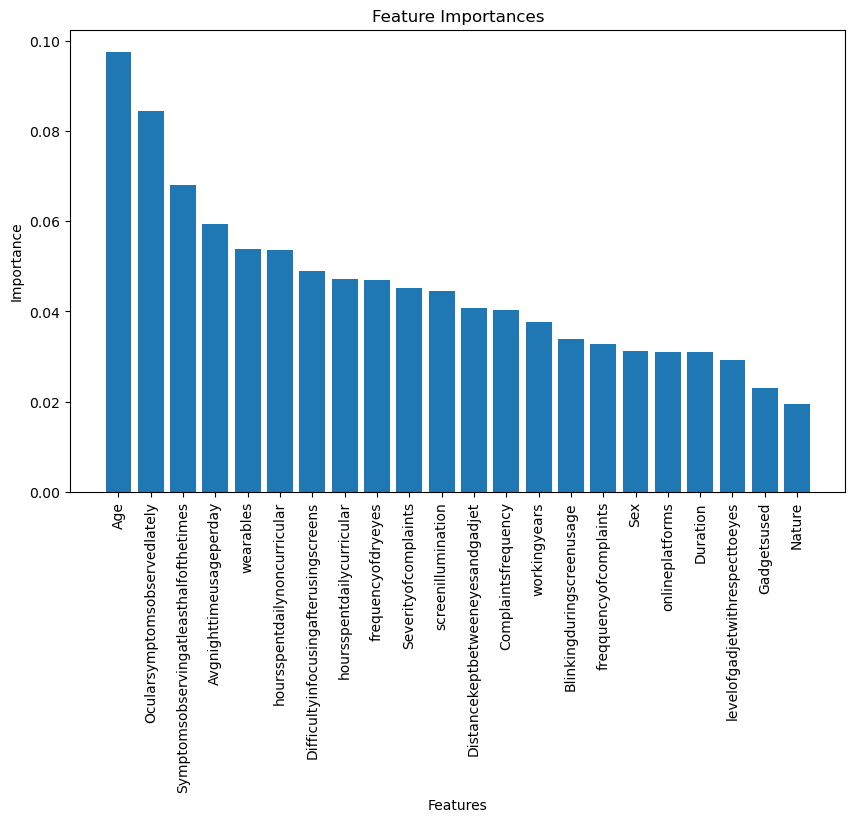

In [10]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
# Assuming 'X_train' contains your training features and 'y_train' contains your target variable
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Separate features and target variables
X_train = data.drop(['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)
y_train = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Train separate models for each target variable
clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()
clf_4 = DecisionTreeClassifier()

# Train each model on the training data
clf_1.fit(X_train, y_train['Schimers1Lefteye'])
clf_2.fit(X_train, y_train['Schimers1righteye'])
clf_3.fit(X_train, y_train['Schimers2Lefteye'])
clf_4.fit(X_train, y_train['Schimers2righteye'])


DecisionTreeClassifier()

In [12]:
X_test =data2.drop(['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)
y_test = data2[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)
y_pred_4 = clf_4.predict(X_test)

# Calculate accuracy for each target variable
accuracy_1 = accuracy_score(y_test['Schimers1Lefteye'], y_pred_1)
accuracy_2 = accuracy_score(y_test['Schimers1righteye'], y_pred_2)
accuracy_3 = accuracy_score(y_test['Schimers2Lefteye'], y_pred_3)
accuracy_4 = accuracy_score(y_test['Schimers2righteye'], y_pred_4)

print("Accuracy for Schimers1Lefteye:", accuracy_1)
print("Accuracy for Schimers1righteye:", accuracy_2)
print("Accuracy for Schimers2Lefteye:", accuracy_3)
print("Accuracy for Schimers2righteye:", accuracy_4)

# Generate classification report for each target variable
report_1 = classification_report(y_test['Schimers1Lefteye'], y_pred_1)
print("Classification Report for Schimers1Lefteye:\n", report_1)

report_2 = classification_report(y_test['Schimers1righteye'], y_pred_2)
print("Classification Report for Schimers1righteye:\n", report_2)

report_3 = classification_report(y_test['Schimers2Lefteye'], y_pred_3)
print("Classification Report for Schimers2Lefteye:\n", report_3)

report_4 = classification_report(y_test['Schimers2righteye'], y_pred_4)
print("Classification Report for Schimers2righteye:\n", report_4)


Accuracy for Schimers1Lefteye: 0.2
Accuracy for Schimers1righteye: 0.0
Accuracy for Schimers2Lefteye: 0.0
Accuracy for Schimers2righteye: 0.0
Classification Report for Schimers1Lefteye:
               precision    recall  f1-score   support

           6       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         1
          16       1.00      1.00      1.00         1
          22       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         0

    accuracy                           0.20         5
   macro avg       0.14      0.14      0.14         5
weighted avg       0.20      0.20      0.20         5

Classification Report for Schimers1righteye:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00       1.0
           6       0.00      0.00      0.00       1.0
       

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     300 non-null    int64
 1   Sex                                     300 non-null    int64
 2   wearables                               300 non-null    int64
 3   Duration                                300 non-null    int64
 4   onlineplatforms                         300 non-null    int64
 5   Nature                                  300 non-null    int64
 6   screenillumination                      300 non-null    int64
 7   workingyears                            300 non-null    int64
 8   hoursspentdailycurricular               300 non-null    int64
 9   hoursspentdailynoncurricular            300 non-null    int64
 10  Gadgetsused                             300 non-null    int64
 11  levelofgadjetwithre

In [14]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame containing the data

# Split the data into features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

regressor_Schimers1Lefteye = RandomForestRegressor()
regressor_Schimers1righteye = RandomForestRegressor()
regressor_Schimers2Lefteye = RandomForestRegressor()
regressor_Schimers2righteye = RandomForestRegressor()

# Fit each model separately for each target variable
regressor_Schimers1Lefteye.fit(X, y['Schimers1Lefteye'])
regressor_Schimers1righteye.fit(X, y['Schimers1righteye'])
regressor_Schimers2Lefteye.fit(X, y['Schimers2Lefteye'])
regressor_Schimers2righteye.fit(X, y['Schimers2righteye'])

# Now each model is trained and ready to make predictions separately


RandomForestRegressor()

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df_test is your DataFrame containing the test data

# Separate features and target variables in the test data
X_test = data2.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])
y_test = data2[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Make predictions using each trained model separately
predictions_Schimers1Lefteye = regressor_Schimers1Lefteye.predict(X_test)
predictions_Schimers1righteye = regressor_Schimers1righteye.predict(X_test)
predictions_Schimers2Lefteye = regressor_Schimers2Lefteye.predict(X_test)
predictions_Schimers2righteye = regressor_Schimers2righteye.predict(X_test)

# Evaluate each model's predictions separately
mae_Schimers1Lefteye = mean_absolute_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
mse_Schimers1Lefteye = mean_squared_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)

mae_Schimers1righteye = mean_absolute_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)
mse_Schimers1righteye = mean_squared_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)

mae_Schimers2Lefteye = mean_absolute_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
mse_Schimers2Lefteye = mean_squared_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)

mae_Schimers2righteye = mean_absolute_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)
mse_Schimers2righteye = mean_squared_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)

# Print or use these evaluation metrics as needed
print("Mean Absolute Error for Schimers1Lefteye:", mae_Schimers1Lefteye)
print("Mean Squared Error for Schimers1Lefteye:", mse_Schimers1Lefteye)

print("Mean Absolute Error for Schimers1righteye:", mae_Schimers1righteye)
print("Mean Squared Error for Schimers1righteye:", mse_Schimers1righteye)

print("Mean Absolute Error for Schimers2Lefteye:", mae_Schimers2Lefteye)
print("Mean Squared Error for Schimers2Lefteye:", mse_Schimers2Lefteye)

print("Mean Absolute Error for Schimers2righteye:", mae_Schimers2righteye)
print("Mean Squared Error for Schimers2righteye:", mse_Schimers2righteye)


Mean Absolute Error for Schimers1Lefteye: 6.953999999999999
Mean Squared Error for Schimers1Lefteye: 73.43861999999999
Mean Absolute Error for Schimers1righteye: 10.315999999999999
Mean Squared Error for Schimers1righteye: 129.39908
Mean Absolute Error for Schimers2Lefteye: 10.547999999999998
Mean Squared Error for Schimers2Lefteye: 139.48924
Mean Absolute Error for Schimers2righteye: 11.816000000000003
Mean Squared Error for Schimers2righteye: 181.72380000000004


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     300 non-null    int64
 1   Sex                                     300 non-null    int64
 2   wearables                               300 non-null    int64
 3   Duration                                300 non-null    int64
 4   onlineplatforms                         300 non-null    int64
 5   Nature                                  300 non-null    int64
 6   screenillumination                      300 non-null    int64
 7   workingyears                            300 non-null    int64
 8   hoursspentdailycurricular               300 non-null    int64
 9   hoursspentdailynoncurricular            300 non-null    int64
 10  Gadgetsused                             300 non-null    int64
 11  levelofgadjetwithre

Feature Importances:
                                        Importance
Age                                       0.096600
Ocularsymptomsobservedlately              0.085018
Symptomsobservingatleasthalfofthetimes    0.069267
Avgnighttimeusageperday                   0.058913
hoursspentdailynoncurricular              0.055574
wearables                                 0.053659
hoursspentdailycurricular                 0.049138
Difficultyinfocusingafterusingscreens     0.047605
frequencyofdryeyes                        0.046115
screenillumination                        0.045945
Severityofcomplaints                      0.044248
Distancekeptbetweeneyesandgadjet          0.042809
Complaintsfrequency                       0.041255
workingyears                              0.040149
freqquencyofcomplaints                    0.032619
Duration                                  0.032452
Sex                                       0.031484
Blinkingduringscreenusage                 0.031386
onlineplat

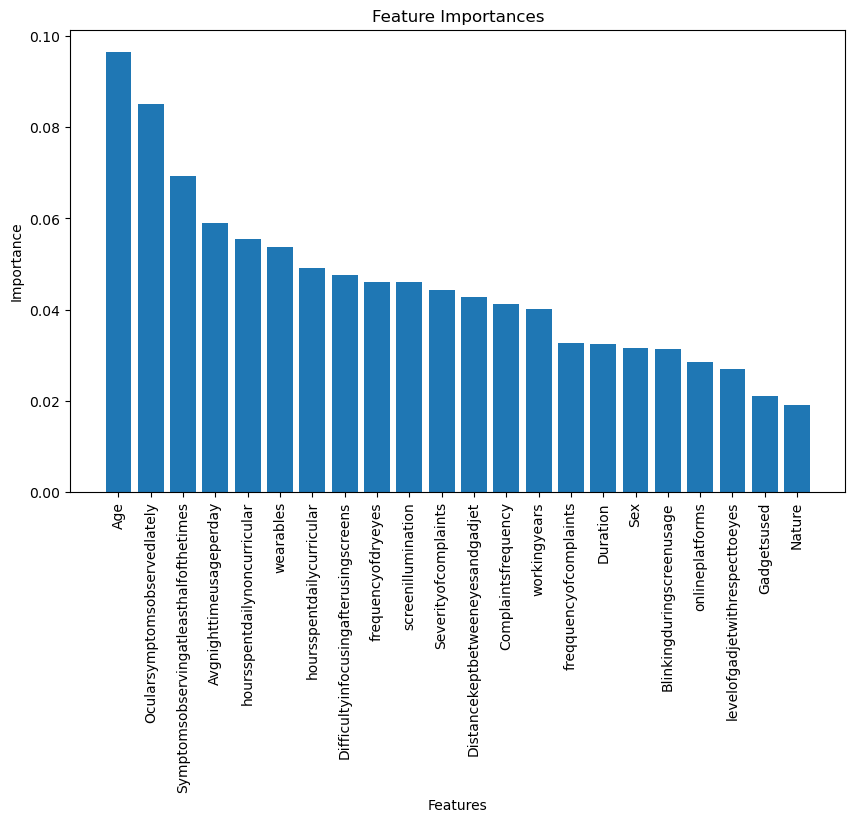

In [17]:
import matplotlib.pyplot as plt

# Assuming 'X_train' contains your training features and 'y_train' contains your target variable
# Initialize a Random Forest classifier
clf = RandomForestClassifier()

# Train the model
clf.fit(X_train, y_train)

# Extract feature importances
feature_importances = pd.DataFrame(clf.feature_importances_, index=X_train.columns, columns=['Importance'])

# Sort feature importances in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importances.index, feature_importances['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.show()


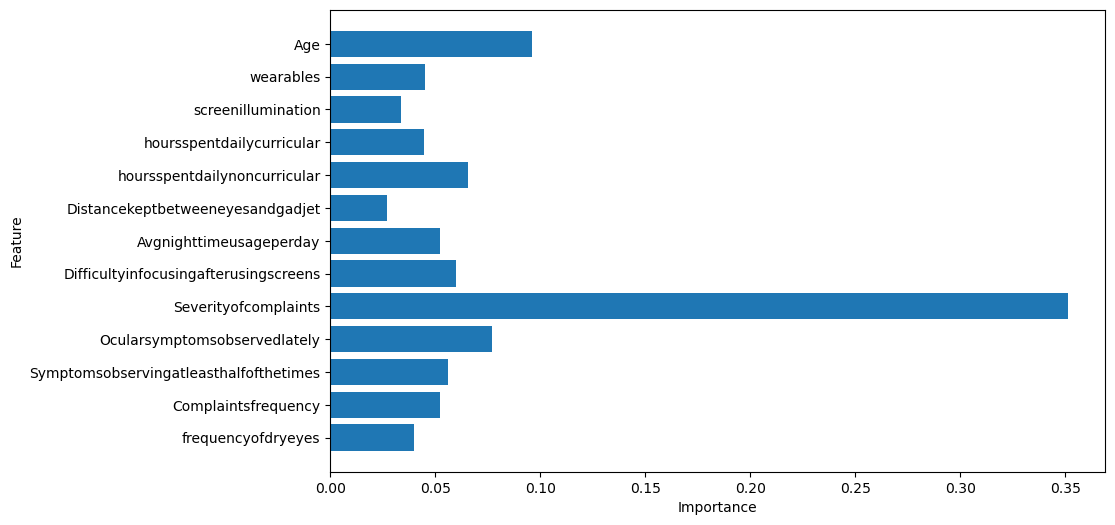

In [43]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame containing the data

# Split the data into features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                      'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                      'Duration','workingyears'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

regressor_Schimers1Lefteye = RandomForestRegressor()
regressor_Schimers1righteye = RandomForestRegressor()
regressor_Schimers2Lefteye = RandomForestRegressor()
regressor_Schimers2righteye = RandomForestRegressor()

# Fit each model separately for each target variable
regressor_Schimers1Lefteye.fit(X, y['Schimers1Lefteye'])
regressor_Schimers1righteye.fit(X, y['Schimers1righteye'])
regressor_Schimers2Lefteye.fit(X, y['Schimers2Lefteye'])
regressor_Schimers2righteye.fit(X, y['Schimers2righteye'])
import matplotlib.pyplot as plt

# Get feature importances for each target variable
feature_importance_Schimers1Lefteye = regressor_Schimers1Lefteye.feature_importances_
feature_importance_Schimers1righteye = regressor_Schimers1righteye.feature_importances_
feature_importance_Schimers2Lefteye = regressor_Schimers2Lefteye.feature_importances_
feature_importance_Schimers2righteye = regressor_Schimers2righteye.feature_importances_

# Get feature names
feature_names = X.columns

# Plot feature importances for each target variable
plt.figure(figsize=(10, 6))

plt.barh(feature_names, feature_importance_Schimers1Lefteye)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.show()


# Now each model is trained and ready to make predictions separately


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df_test is your DataFrame containing the test data

# Separate features and target variables in the test data
X_test = data2.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                             'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears'
                            ])
y_test = data2[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Make predictions using each trained model separately
predictions_Schimers1Lefteye = regressor_Schimers1Lefteye.predict(X_test)
predictions_Schimers1righteye = regressor_Schimers1righteye.predict(X_test)
predictions_Schimers2Lefteye = regressor_Schimers2Lefteye.predict(X_test)
predictions_Schimers2righteye = regressor_Schimers2righteye.predict(X_test)

# Evaluate each model's predictions separately
mae_Schimers1Lefteye = mean_absolute_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
mse_Schimers1Lefteye = mean_squared_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)

mae_Schimers1righteye = mean_absolute_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)
mse_Schimers1righteye = mean_squared_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)

mae_Schimers2Lefteye = mean_absolute_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
mse_Schimers2Lefteye = mean_squared_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)

mae_Schimers2righteye = mean_absolute_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)
mse_Schimers2righteye = mean_squared_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)

# Print or use these evaluation metrics as needed
print("Mean Absolute Error for Schimers1Lefteye:", mae_Schimers1Lefteye)
print("Mean Squared Error for Schimers1Lefteye:", mse_Schimers1Lefteye)

print("Mean Absolute Error for Schimers1righteye:", mae_Schimers1righteye)
print("Mean Squared Error for Schimers1righteye:", mse_Schimers1righteye)

print("Mean Absolute Error for Schimers2Lefteye:", mae_Schimers2Lefteye)
print("Mean Squared Error for Schimers2Lefteye:", mse_Schimers2Lefteye)

print("Mean Absolute Error for Schimers2righteye:", mae_Schimers2righteye)
print("Mean Squared Error for Schimers2righteye:", mse_Schimers2righteye)
from sklearn.metrics import r2_score

# Assuming y_true are the actual target values and y_pred are the predicted values
from sklearn.metrics import r2_score

# Calculate R-squared for each target variable separately
r2_Schimers1Lefteye = r2_score(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
r2_Schimers1righteye = r2_score(y_test['Schimers1righteye'], predictions_Schimers1righteye)
r2_Schimers2Lefteye = r2_score(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
r2_Schimers2righteye = r2_score(y_test['Schimers2righteye'], predictions_Schimers2righteye)

# Print or use these R-squared values as needed
print("R-squared for Schimers1Lefteye:", r2_Schimers1Lefteye)
print("R-squared for Schimers1righteye:", r2_Schimers1righteye)
print("R-squared for Schimers2Lefteye:", r2_Schimers2Lefteye)
print("R-squared for Schimers2righteye:", r2_Schimers2righteye)



Mean Absolute Error for Schimers1Lefteye: 8.040000000000001
Mean Squared Error for Schimers1Lefteye: 93.0212
Mean Absolute Error for Schimers1righteye: 10.484000000000002
Mean Squared Error for Schimers1righteye: 130.99312
Mean Absolute Error for Schimers2Lefteye: 10.463999999999999
Mean Squared Error for Schimers2Lefteye: 135.21671999999998
Mean Absolute Error for Schimers2righteye: 10.932
Mean Squared Error for Schimers2righteye: 158.13907999999998
R-squared for Schimers1Lefteye: -1.8222451456310673
R-squared for Schimers1righteye: -2.704556561085972
R-squared for Schimers2Lefteye: -2.81537020316027
R-squared for Schimers2righteye: -2.2565708401976936


In [20]:
from sklearn.ensemble import RandomForestRegressor

# Assuming df is your DataFrame containing the data

# Split the data into features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                       'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears','Difficultyinfocusingafterusingscreens','Complaintsfrequency',
                       'Severityofcomplaints','Distancekeptbetweeneyesandgadjet','hoursspentdailycurricular','frequencyofdryeyes',
                       'screenillumination','Avgnighttimeusageperday','wearables','hoursspentdailynoncurricular',
                       'Ocularsymptomsobservedlately','Symptomsobservingatleasthalfofthetimes'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Create separate Random Forest Regressor models for each target variable
regressor_Schimers1Lefteye = RandomForestRegressor()
regressor_Schimers1righteye = RandomForestRegressor()
regressor_Schimers2Lefteye = RandomForestRegressor()
regressor_Schimers2righteye = RandomForestRegressor()

# Fit each model separately for each target variable
regressor_Schimers1Lefteye.fit(X, y['Schimers1Lefteye'])
regressor_Schimers1righteye.fit(X, y['Schimers1righteye'])
regressor_Schimers2Lefteye.fit(X, y['Schimers2Lefteye'])
regressor_Schimers2righteye.fit(X, y['Schimers2righteye'])


RandomForestRegressor()

In [21]:
# Assuming X_test and y_test are your testing features and target variables respectively
X_test = data2.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                       'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears','Difficultyinfocusingafterusingscreens','Complaintsfrequency',
                       'Severityofcomplaints','Distancekeptbetweeneyesandgadjet','hoursspentdailycurricular','frequencyofdryeyes',
                       'screenillumination','Avgnighttimeusageperday','wearables','hoursspentdailynoncurricular',
                       'Ocularsymptomsobservedlately','Symptomsobservingatleasthalfofthetimes'])

# Evaluate model for Schimers1Lefteye
predictions_Schimers1Lefteye = regressor_Schimers1Lefteye.predict(X_test)
# Evaluate model for Schimers1righteye
predictions_Schimers1righteye = regressor_Schimers1righteye.predict(X_test)
# Evaluate model for Schimers2Lefteye
predictions_Schimers2Lefteye = regressor_Schimers2Lefteye.predict(X_test)
# Evaluate model for Schimers2righteye
predictions_Schimers2righteye = regressor_Schimers2righteye.predict(X_test)

# Evaluate the performance of each model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For Schimers1Lefteye
mse_Schimers1Lefteye = mean_squared_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
mae_Schimers1Lefteye = mean_absolute_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
r2_Schimers1Lefteye = r2_score(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)

# For Schimers1righteye
mse_Schimers1righteye = mean_squared_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)
mae_Schimers1righteye = mean_absolute_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)
r2_Schimers1righteye = r2_score(y_test['Schimers1righteye'], predictions_Schimers1righteye)

# For Schimers2Lefteye
mse_Schimers2Lefteye = mean_squared_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
mae_Schimers2Lefteye = mean_absolute_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
r2_Schimers2Lefteye = r2_score(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)

# For Schimers2righteye
mse_Schimers2righteye = mean_squared_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)
mae_Schimers2righteye = mean_absolute_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)
r2_Schimers2righteye = r2_score(y_test['Schimers2righteye'], predictions_Schimers2righteye)

# Print the evaluation metrics
# Print the evaluation metrics for Schimers1Lefteye
print("Evaluation Metrics for Schimers1Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers1Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers1Lefteye)
print("R-squared (R2):", r2_Schimers1Lefteye)
print()

# Print the evaluation metrics for Schimers1righteye
print("Evaluation Metrics for Schimers1righteye:")
print("Mean Squared Error (MSE):", mse_Schimers1righteye)
print("Mean Absolute Error (MAE):", mae_Schimers1righteye)
print("R-squared (R2):", r2_Schimers1righteye)
print()

# Print the evaluation metrics for Schimers2Lefteye
print("Evaluation Metrics for Schimers2Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers2Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers2Lefteye)
print("R-squared (R2):", r2_Schimers2Lefteye)
print()

# Print the evaluation metrics for Schimers2righteye
print("Evaluation Metrics for Schimers2righteye:")
print("Mean Squared Error (MSE):", mse_Schimers2righteye)
print("Mean Absolute Error (MAE):", mae_Schimers2righteye)
print("R-squared (R2):", r2_Schimers2righteye)
print()

# Repeat the above for the other target variables...


Evaluation Metrics for Schimers1Lefteye:
Mean Squared Error (MSE): 93.8701417239624
Mean Absolute Error (MAE): 8.362696981508249
R-squared (R2): -1.8480018726930334

Evaluation Metrics for Schimers1righteye:
Mean Squared Error (MSE): 132.497367115823
Mean Absolute Error (MAE): 9.855829093273837
R-squared (R2): -2.7470974863072106

Evaluation Metrics for Schimers2Lefteye:
Mean Squared Error (MSE): 114.64243547965745
Mean Absolute Error (MAE): 8.899575016800378
R-squared (R2): -2.2348317008932685

Evaluation Metrics for Schimers2righteye:
Mean Squared Error (MSE): 156.4573238820236
Mean Absolute Error (MAE): 10.712418198221977
R-squared (R2): -2.221938300700651



In [48]:
!pip install graphviz

  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 472.9 kB/s eta 0:00:00


In [50]:
from sklearn.tree import DecisionTreeRegressor

# Assuming df is your DataFrame containing the data

# Split the data into features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                             'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears'])
y_Schimers1Lefteye = data['Schimers1Lefteye']
y_Schimers1righteye = data['Schimers1righteye']
y_Schimers2Lefteye = data['Schimers2Lefteye']
y_Schimers2righteye = data['Schimers2righteye']

# Create separate Decision Tree Regressor models for each target variable
decision_tree_Schimers1Lefteye = DecisionTreeRegressor(criterion='friedman_mse')
decision_tree_Schimers1righteye = DecisionTreeRegressor(criterion='friedman_mse')
decision_tree_Schimers2Lefteye = DecisionTreeRegressor(criterion='friedman_mse')
decision_tree_Schimers2righteye = DecisionTreeRegressor(criterion='friedman_mse')

# Fit each model separately for each target variable
decision_tree_Schimers1Lefteye.fit(X, y_Schimers1Lefteye)
decision_tree_Schimers1righteye.fit(X, y_Schimers1righteye)
decision_tree_Schimers2Lefteye.fit(X, y_Schimers2Lefteye)
decision_tree_Schimers2righteye.fit(X, y_Schimers2righteye)
from sklearn.tree import export_graphviz
import graphviz

# Visualize the decision tree for Schimers1Lefteye
dot_data_Schimers1Lefteye = export_graphviz(decision_tree_Schimers1Lefteye, out_file=None, 
                               feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph_Schimers1Lefteye = graphviz.Source(dot_data_Schimers1Lefteye)
graph_Schimers1Lefteye.render("decision_tree_Schimers1Lefteye")

# Visualize the decision tree for Schimers1righteye
dot_data_Schimers1righteye = export_graphviz(decision_tree_Schimers1righteye, out_file=None, 
                               feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph_Schimers1righteye = graphviz.Source(dot_data_Schimers1righteye)
graph_Schimers1righteye.render("decision_tree_Schimers1righteye")

# Visualize the decision tree for Schimers2Lefteye
dot_data_Schimers2Lefteye = export_graphviz(decision_tree_Schimers2Lefteye, out_file=None, 
                               feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph_Schimers2Lefteye = graphviz.Source(dot_data_Schimers2Lefteye)
graph_Schimers2Lefteye.render("decision_tree_Schimers2Lefteye")

# Visualize the decision tree for Schimers2righteye
dot_data_Schimers2righteye = export_graphviz(decision_tree_Schimers2righteye, out_file=None, 
                               feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graph_Schimers2righteye = graphviz.Source(dot_data_Schimers2righteye)
graph_Schimers2righteye.render("decision_tree_Schimers2righteye")


ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [23]:
# Assuming X_test is your testing features
X_test = data2.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                             'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears'])
y_test = data2[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Define y_test for each target variable
y_test_Schimers1Lefteye = y_test['Schimers1Lefteye']
y_test_Schimers1righteye = y_test['Schimers1righteye']
y_test_Schimers2Lefteye = y_test['Schimers2Lefteye']
y_test_Schimers2righteye = y_test['Schimers2righteye']

# Make predictions for each target variable
predictions_Schimers1Lefteye = decision_tree_Schimers1Lefteye.predict(X_test)
predictions_Schimers1righteye = decision_tree_Schimers1righteye.predict(X_test)
predictions_Schimers2Lefteye = decision_tree_Schimers2Lefteye.predict(X_test)
predictions_Schimers2righteye = decision_tree_Schimers2righteye.predict(X_test)

# Print R-squared values
print("R-squared for Schimers1Lefteye:", r2_score(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye))
print("R-squared for Schimers1righteye:", r2_score(y_test_Schimers1righteye, predictions_Schimers1righteye))
print("R-squared for Schimers2Lefteye:", r2_score(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye))
print("R-squared for Schimers2righteye:", r2_score(y_test_Schimers2righteye, predictions_Schimers2righteye))



R-squared for Schimers1Lefteye: -3.5206310679611637
R-squared for Schimers1righteye: -1.794117647058823
R-squared for Schimers2Lefteye: -4.699774266365688
R-squared for Schimers2righteye: -1.2199341021416807


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

# Assuming df is your DataFrame containing the data
# Split the data into features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                             'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears'])

# Create separate Gradient Boosting Regressor models for each target variable
gradient_boosting_Schimers1Lefteye = GradientBoostingRegressor()
gradient_boosting_Schimers1righteye = GradientBoostingRegressor()
gradient_boosting_Schimers2Lefteye = GradientBoostingRegressor()
gradient_boosting_Schimers2righteye = GradientBoostingRegressor()

# Fit each model separately for each target variable
gradient_boosting_Schimers1Lefteye.fit(X, data['Schimers1Lefteye'])
gradient_boosting_Schimers1righteye.fit(X, data['Schimers1righteye'])
gradient_boosting_Schimers2Lefteye.fit(X, data['Schimers2Lefteye'])
gradient_boosting_Schimers2righteye.fit(X, data['Schimers2righteye'])


GradientBoostingRegressor()

Evaluation Metrics for Schimers1Lefteye:
Mean Squared Error (MSE): 51.65949054634538
Mean Absolute Error (MAE): 5.571058447897959
R-squared (R2): 0.1484075483238545

Evaluation Metrics for Schimers1righteye:
Mean Squared Error (MSE): 38.31810675130374
Mean Absolute Error (MAE): 4.914752171277754
R-squared (R2): 0.2476811501707381

Evaluation Metrics for Schimers2Lefteye:
Mean Squared Error (MSE): 42.51695749606904
Mean Absolute Error (MAE): 5.265846933783729
R-squared (R2): 0.17989537395867616

Evaluation Metrics for Schimers2righteye:
Mean Squared Error (MSE): 41.3289338244201
Mean Absolute Error (MAE): 5.243008438956157
R-squared (R2): 0.19678159220497016



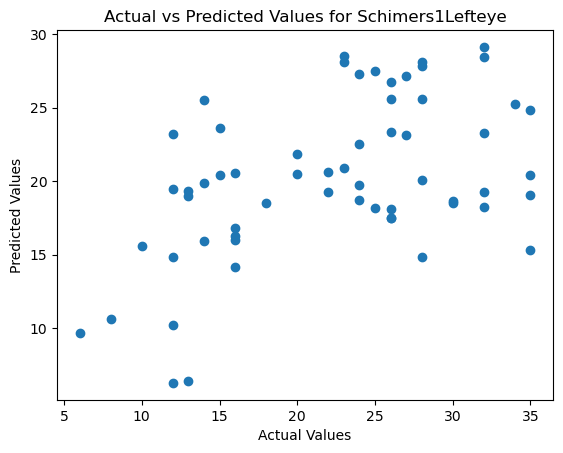

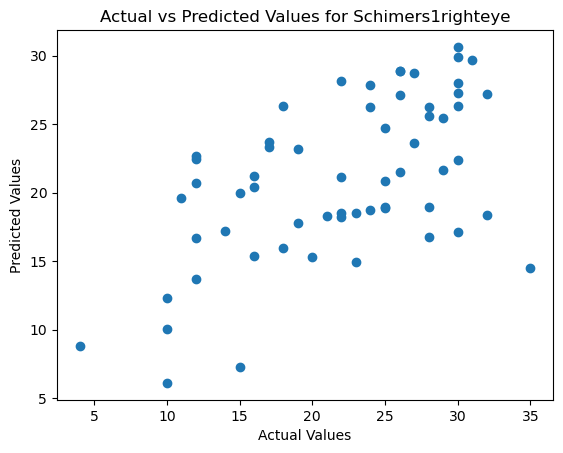

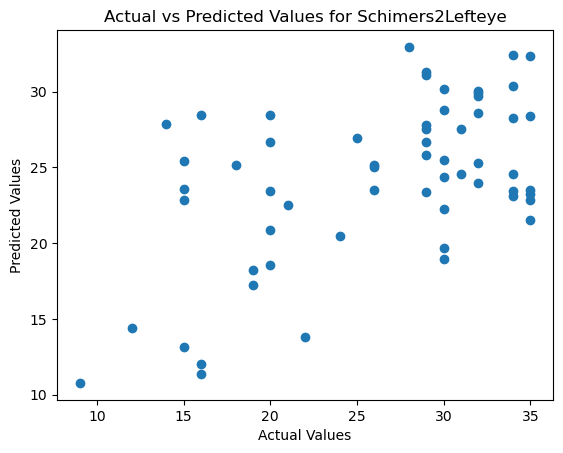

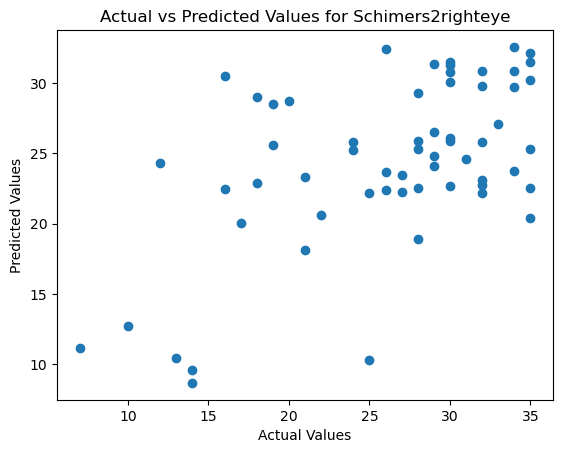

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Split the data into features (X) and target variables (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                       'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                       'Duration','workingyears'])
y_Schimers1Lefteye = data['Schimers1Lefteye']
y_Schimers1righteye = data['Schimers1righteye']
y_Schimers2Lefteye = data['Schimers2Lefteye']
y_Schimers2righteye = data['Schimers2righteye']

# Split the data into training and testing sets
X_train, X_test, y_train_Schimers1Lefteye, y_test_Schimers1Lefteye = train_test_split(X, y_Schimers1Lefteye, test_size=0.2, random_state=42)
X_train, X_test, y_train_Schimers1righteye, y_test_Schimers1righteye = train_test_split(X, y_Schimers1righteye, test_size=0.2, random_state=42)
X_train, X_test, y_train_Schimers2Lefteye, y_test_Schimers2Lefteye = train_test_split(X, y_Schimers2Lefteye, test_size=0.2, random_state=42)
X_train, X_test, y_train_Schimers2righteye, y_test_Schimers2righteye = train_test_split(X, y_Schimers2righteye, test_size=0.2, random_state=42)

# Create Gradient Boosting Regressor models for each target variable
gradient_boosting_Schimers1Lefteye = GradientBoostingRegressor()
gradient_boosting_Schimers1righteye = GradientBoostingRegressor()
gradient_boosting_Schimers2Lefteye = GradientBoostingRegressor()
gradient_boosting_Schimers2righteye = GradientBoostingRegressor()

# Fit the models on the training data
gradient_boosting_Schimers1Lefteye.fit(X_train, y_train_Schimers1Lefteye)
gradient_boosting_Schimers1righteye.fit(X_train, y_train_Schimers1righteye)
gradient_boosting_Schimers2Lefteye.fit(X_train, y_train_Schimers2Lefteye)
gradient_boosting_Schimers2righteye.fit(X_train, y_train_Schimers2righteye)

# Make predictions on the testing data
predictions_Schimers1Lefteye = gradient_boosting_Schimers1Lefteye.predict(X_test)
predictions_Schimers1righteye = gradient_boosting_Schimers1righteye.predict(X_test)
predictions_Schimers2Lefteye = gradient_boosting_Schimers2Lefteye.predict(X_test)
predictions_Schimers2righteye = gradient_boosting_Schimers2righteye.predict(X_test)

# Evaluate the performance of the models
mse_Schimers1Lefteye = mean_squared_error(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)
mae_Schimers1Lefteye = mean_absolute_error(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)
r2_Schimers1Lefteye = r2_score(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)

mse_Schimers1righteye = mean_squared_error(y_test_Schimers1righteye, predictions_Schimers1righteye)
mae_Schimers1righteye = mean_absolute_error(y_test_Schimers1righteye, predictions_Schimers1righteye)
r2_Schimers1righteye = r2_score(y_test_Schimers1righteye, predictions_Schimers1righteye)

mse_Schimers2Lefteye = mean_squared_error(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)
mae_Schimers2Lefteye = mean_absolute_error(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)
r2_Schimers2Lefteye = r2_score(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)

mse_Schimers2righteye = mean_squared_error(y_test_Schimers2righteye, predictions_Schimers2righteye)
mae_Schimers2righteye = mean_absolute_error(y_test_Schimers2righteye, predictions_Schimers2righteye)
r2_Schimers2righteye = r2_score(y_test_Schimers2righteye, predictions_Schimers2righteye)

# Print evaluation metrics for each target variable
print("Evaluation Metrics for Schimers1Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers1Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers1Lefteye)
print("R-squared (R2):", r2_Schimers1Lefteye)
print()

print("Evaluation Metrics for Schimers1righteye:")
print("Mean Squared Error (MSE):", mse_Schimers1righteye)
print("Mean Absolute Error (MAE):", mae_Schimers1righteye)
print("R-squared (R2):", r2_Schimers1righteye)
print()

print("Evaluation Metrics for Schimers2Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers2Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers2Lefteye)
print("R-squared (R2):", r2_Schimers2Lefteye)
print()

print("Evaluation Metrics for Schimers2righteye:")
print("Mean Squared Error (MSE):", mse_Schimers2righteye)
print("Mean Absolute Error (MAE):", mae_Schimers2righteye)
print("R-squared (R2):", r2_Schimers2righteye)
print()

# Plotting actual vs predicted values for Schimers1Lefteye
plt.scatter(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Schimers1Lefteye')
plt.show()

# Plotting actual vs predicted values for Schimers1righteye
plt.scatter(y_test_Schimers1righteye, predictions_Schimers1righteye)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Schimers1righteye')
plt.show()

# Plotting actual vs predicted values for Schimers2Lefteye
plt.scatter(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Schimers2Lefteye')
plt.show()

# Plotting actual vs predicted values for Schimers2righteye
plt.scatter(y_test_Schimers2righteye, predictions_Schimers2righteye)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Schimers2righteye')
plt.show()



In [54]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features (X) and target variables (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                             'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                             'Duration','workingyears'])
y_Schimers1Lefteye = data['Schimers1Lefteye']
y_Schimers1righteye = data['Schimers1righteye']
y_Schimers2Lefteye = data['Schimers2Lefteye']
y_Schimers2righteye = data['Schimers2righteye']

# Split the data into training and testing sets
X_train, X_test, y_train_Schimers1Lefteye, y_test_Schimers1Lefteye = train_test_split(X, y_Schimers1Lefteye, test_size=0.2, random_state=42)
X_train, X_test, y_train_Schimers1righteye, y_test_Schimers1righteye = train_test_split(X, y_Schimers1righteye, test_size=0.2, random_state=42)
X_train, X_test, y_train_Schimers2Lefteye, y_test_Schimers2Lefteye = train_test_split(X, y_Schimers2Lefteye, test_size=0.2, random_state=42)
X_train, X_test, y_train_Schimers2righteye, y_test_Schimers2righteye = train_test_split(X, y_Schimers2righteye, test_size=0.2, random_state=42)

# Create SVR models for each target variable
svr_Schimers1Lefteye = SVR()
svr_Schimers1righteye = SVR()
svr_Schimers2Lefteye = SVR()
svr_Schimers2righteye = SVR()

# Fit SVR models to training data
svr_Schimers1Lefteye.fit(X_train, y_train_Schimers1Lefteye)
svr_Schimers1righteye.fit(X_train, y_train_Schimers1righteye)
svr_Schimers2Lefteye.fit(X_train, y_train_Schimers2Lefteye)
svr_Schimers2righteye.fit(X_train, y_train_Schimers2righteye)

# Make predictions on the testing set
predictions_Schimers1Lefteye = svr_Schimers1Lefteye.predict(X_test)
predictions_Schimers1righteye = svr_Schimers1righteye.predict(X_test)
predictions_Schimers2Lefteye = svr_Schimers2Lefteye.predict(X_test)
predictions_Schimers2righteye = svr_Schimers2righteye.predict(X_test)

# Evaluate the performance of the models
mse_Schimers1Lefteye = mean_squared_error(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)
mae_Schimers1Lefteye = mean_absolute_error(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)
r2_Schimers1Lefteye = r2_score(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)

mse_Schimers1righteye = mean_squared_error(y_test_Schimers1righteye, predictions_Schimers1righteye)
mae_Schimers1righteye = mean_absolute_error(y_test_Schimers1righteye, predictions_Schimers1righteye)
r2_Schimers1righteye = r2_score(y_test_Schimers1righteye, predictions_Schimers1righteye)

mse_Schimers2Lefteye = mean_squared_error(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)
mae_Schimers2Lefteye = mean_absolute_error(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)
r2_Schimers2Lefteye = r2_score(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)

mse_Schimers2righteye = mean_squared_error(y_test_Schimers2righteye, predictions_Schimers2righteye)
mae_Schimers2righteye = mean_absolute_error(y_test_Schimers2righteye, predictions_Schimers2righteye)
r2_Schimers2righteye = r2_score(y_test_Schimers2righteye, predictions_Schimers2righteye)

# Print evaluation metrics for each target variable
print("Evaluation Metrics for Schimers1Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers1Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers1Lefteye)
print("R-squared (R2):", r2_Schimers1Lefteye)
print()

print("Evaluation Metrics for Schimers1righteye:")
print("Mean Squared Error (MSE):", mse_Schimers1righteye)
print("Mean Absolute Error (MAE):", mae_Schimers1righteye)
print("R-squared (R2):", r2_Schimers1righteye)
print()

print("Evaluation Metrics for Schimers2Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers2Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers2Lefteye)
print("R-squared (R2):", r2_Schimers2Lefteye)
print()

print("Evaluation Metrics for Schimers2righteye:")
print("Mean Squared Error (MSE):", mse_Schimers2righteye)
print("Mean Absolute Error (MAE):", mae_Schimers2righteye)
print("R-squared (R2):", r2_Schimers2righteye)
print()


Evaluation Metrics for Schimers1Lefteye:
Mean Squared Error (MSE): 57.934750163754856
Mean Absolute Error (MAE): 6.582259398989942
R-squared (R2): 0.04496162452598418

Evaluation Metrics for Schimers1righteye:
Mean Squared Error (MSE): 47.19984708958982
Mean Absolute Error (MAE): 5.848843956497311
R-squared (R2): 0.07330143148711099

Evaluation Metrics for Schimers2Lefteye:
Mean Squared Error (MSE): 50.80892154614288
Mean Absolute Error (MAE): 5.99827193022794
R-squared (R2): 0.019952648116578042

Evaluation Metrics for Schimers2righteye:
Mean Squared Error (MSE): 49.11698375463722
Mean Absolute Error (MAE): 5.521293948640605
R-squared (R2): 0.04542261712584561



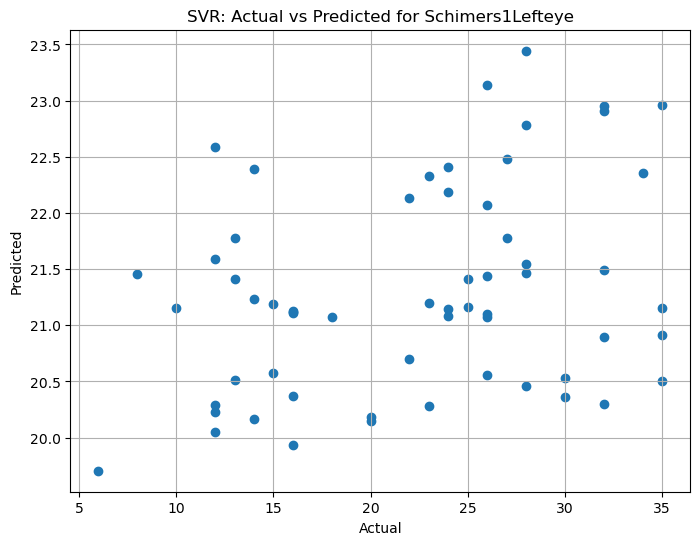

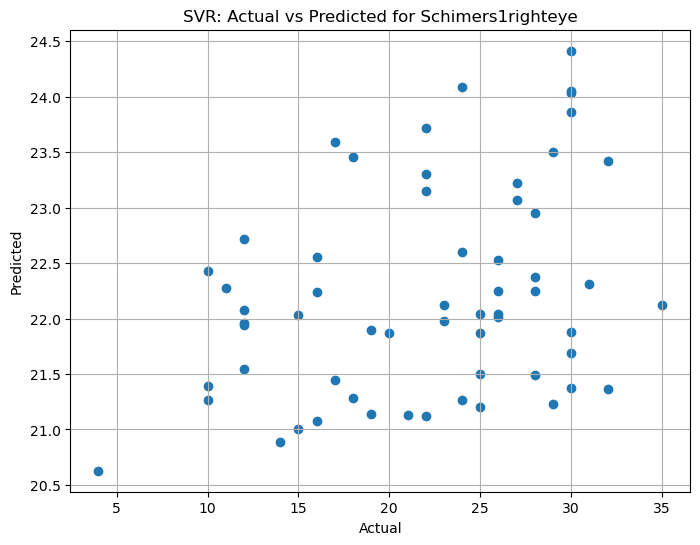

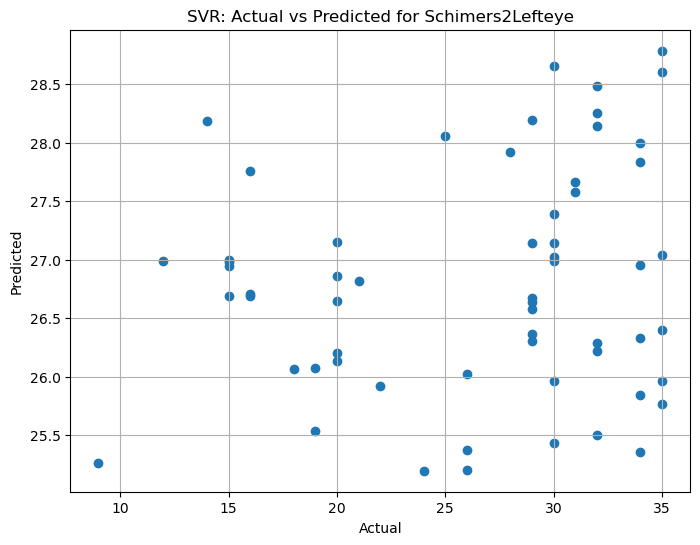

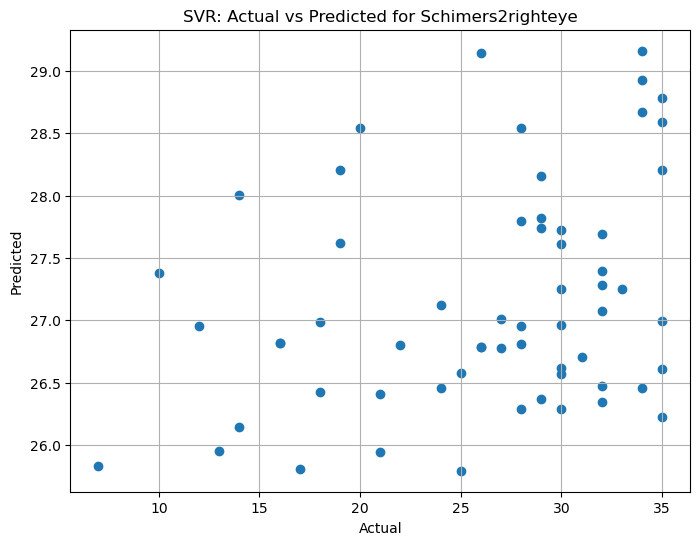

In [55]:
import matplotlib.pyplot as plt

# Plotting Schimers1Lefteye
plt.figure(figsize=(8, 6))
plt.scatter(y_test_Schimers1Lefteye, predictions_Schimers1Lefteye)
plt.title('SVR: Actual vs Predicted for Schimers1Lefteye')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Plotting Schimers1righteye
plt.figure(figsize=(8, 6))
plt.scatter(y_test_Schimers1righteye, predictions_Schimers1righteye)
plt.title('SVR: Actual vs Predicted for Schimers1righteye')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Plotting Schimers2Lefteye
plt.figure(figsize=(8, 6))
plt.scatter(y_test_Schimers2Lefteye, predictions_Schimers2Lefteye)
plt.title('SVR: Actual vs Predicted for Schimers2Lefteye')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()

# Plotting Schimers2righteye
plt.figure(figsize=(8, 6))
plt.scatter(y_test_Schimers2righteye, predictions_Schimers2righteye)
plt.title('SVR: Actual vs Predicted for Schimers2righteye')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid(True)
plt.show()


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     300 non-null    int64
 1   Sex                                     300 non-null    int64
 2   wearables                               300 non-null    int64
 3   Duration                                300 non-null    int64
 4   onlineplatforms                         300 non-null    int64
 5   Nature                                  300 non-null    int64
 6   screenillumination                      300 non-null    int64
 7   workingyears                            300 non-null    int64
 8   hoursspentdailycurricular               300 non-null    int64
 9   hoursspentdailynoncurricular            300 non-null    int64
 10  Gadgetsused                             300 non-null    int64
 11  levelofgadjetwithre

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Separate features and target variables
X = data.drop(['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'], axis=1)
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train separate models for each target variable
clf_1 = DecisionTreeClassifier()
clf_2 = DecisionTreeClassifier()
clf_3 = DecisionTreeClassifier()
clf_4 = DecisionTreeClassifier()

# Train each model on the training data
clf_1.fit(X_train, y_train['Schimers1Lefteye'])
clf_2.fit(X_train, y_train['Schimers1righteye'])
clf_3.fit(X_train, y_train['Schimers2Lefteye'])
clf_4.fit(X_train, y_train['Schimers2righteye'])

# Make predictions on the test set for each target variable
y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)
y_pred_4 = clf_4.predict(X_test)

# Calculate accuracy for each target variable
accuracy_1 = accuracy_score(y_test['Schimers1Lefteye'], y_pred_1)
accuracy_2 = accuracy_score(y_test['Schimers1righteye'], y_pred_2)
accuracy_3 = accuracy_score(y_test['Schimers2Lefteye'], y_pred_3)
accuracy_4 = accuracy_score(y_test['Schimers2righteye'], y_pred_4)

print("Accuracy for Schimers1Lefteye:", accuracy_1)
print("Accuracy for Schimers1righteye:", accuracy_2)
print("Accuracy for Schimers2Lefteye:", accuracy_3)
print("Accuracy for Schimers2righteye:", accuracy_4)

# Generate classification report for each target variable
report_1 = classification_report(y_test['Schimers1Lefteye'], y_pred_1)
print("Classification Report for Schimers1Lefteye:\n", report_1)

report_2 = classification_report(y_test['Schimers1righteye'], y_pred_2)
print("Classification Report for Schimers1righteye:\n", report_2)

report_3 = classification_report(y_test['Schimers2Lefteye'], y_pred_3)
print("Classification Report for Schimers2Lefteye:\n", report_3)

report_4 = classification_report(y_test['Schimers2righteye'], y_pred_4)
print("Classification Report for Schimers2righteye:\n", report_4)


Accuracy for Schimers1Lefteye: 0.03333333333333333
Accuracy for Schimers1righteye: 0.08333333333333333
Accuracy for Schimers2Lefteye: 0.06666666666666667
Accuracy for Schimers2righteye: 0.1
Classification Report for Schimers1Lefteye:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         5
          17       0.00      0.00      0.00         0
        

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saira\anaconda3\Lib\site-packages\sklearn\metrics\_cla

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                       'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                       'Duration','workingyears'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create separate Random Forest Regressor models for each target variable
regressor_Schimers1Lefteye = RandomForestRegressor()
regressor_Schimers1righteye = RandomForestRegressor()
regressor_Schimers2Lefteye = RandomForestRegressor()
regressor_Schimers2righteye = RandomForestRegressor()

# Fit each model separately for each target variable
regressor_Schimers1Lefteye.fit(X_train, y_train['Schimers1Lefteye'])
regressor_Schimers1righteye.fit(X_train, y_train['Schimers1righteye'])
regressor_Schimers2Lefteye.fit(X_train, y_train['Schimers2Lefteye'])
regressor_Schimers2righteye.fit(X_train, y_train['Schimers2righteye'])

# Evaluate each model
# Evaluate model for Schimers1Lefteye
predictions_Schimers1Lefteye = regressor_Schimers1Lefteye.predict(X_test)
mse_Schimers1Lefteye = mean_squared_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
mae_Schimers1Lefteye = mean_absolute_error(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)
r2_Schimers1Lefteye = r2_score(y_test['Schimers1Lefteye'], predictions_Schimers1Lefteye)

# Evaluate model for Schimers1righteye
predictions_Schimers1righteye = regressor_Schimers1righteye.predict(X_test)
mse_Schimers1righteye = mean_squared_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)
mae_Schimers1righteye = mean_absolute_error(y_test['Schimers1righteye'], predictions_Schimers1righteye)
r2_Schimers1righteye = r2_score(y_test['Schimers1righteye'], predictions_Schimers1righteye)

# Evaluate model for Schimers2Lefteye
predictions_Schimers2Lefteye = regressor_Schimers2Lefteye.predict(X_test)
mse_Schimers2Lefteye = mean_squared_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
mae_Schimers2Lefteye = mean_absolute_error(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)
r2_Schimers2Lefteye = r2_score(y_test['Schimers2Lefteye'], predictions_Schimers2Lefteye)

# Evaluate model for Schimers2righteye
predictions_Schimers2righteye = regressor_Schimers2righteye.predict(X_test)
mse_Schimers2righteye = mean_squared_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)
mae_Schimers2righteye = mean_absolute_error(y_test['Schimers2righteye'], predictions_Schimers2righteye)
r2_Schimers2righteye = r2_score(y_test['Schimers2righteye'], predictions_Schimers2righteye)

# Print the evaluation metrics
print("Evaluation Metrics for Schimers1Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers1Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers1Lefteye)
print("R-squared (R2):", r2_Schimers1Lefteye)
print()

print("Evaluation Metrics for Schimers1righteye:")
print("Mean Squared Error (MSE):", mse_Schimers1righteye)
print("Mean Absolute Error (MAE):", mae_Schimers1righteye)
print("R-squared (R2):", r2_Schimers1righteye)
print()

print("Evaluation Metrics for Schimers2Lefteye:")
print("Mean Squared Error (MSE):", mse_Schimers2Lefteye)
print("Mean Absolute Error (MAE):", mae_Schimers2Lefteye)
print("R-squared (R2):", r2_Schimers2Lefteye)
print()

print("Evaluation Metrics for Schimers2righteye:")
print("Mean Squared Error (MSE):", mse_Schimers2righteye)
print("Mean Absolute Error (MAE):", mae_Schimers2righteye)
print("R-squared (R2):", r2_Schimers2righteye)
print()


Evaluation Metrics for Schimers1Lefteye:
Mean Squared Error (MSE): 54.32855666666667
Mean Absolute Error (MAE): 5.776666666666667
R-squared (R2): 0.10440872957725844

Evaluation Metrics for Schimers1righteye:
Mean Squared Error (MSE): 35.70511499999999
Mean Absolute Error (MAE): 4.7795
R-squared (R2): 0.29898334424083783

Evaluation Metrics for Schimers2Lefteye:
Mean Squared Error (MSE): 43.882843333333334
Mean Absolute Error (MAE): 5.272333333333334
R-squared (R2): 0.15354896161512255

Evaluation Metrics for Schimers2righteye:
Mean Squared Error (MSE): 37.25344333333333
Mean Absolute Error (MAE): 4.979000000000001
R-squared (R2): 0.27598782087618434



In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Age                                     300 non-null    int64
 1   Sex                                     300 non-null    int64
 2   wearables                               300 non-null    int64
 3   Duration                                300 non-null    int64
 4   onlineplatforms                         300 non-null    int64
 5   Nature                                  300 non-null    int64
 6   screenillumination                      300 non-null    int64
 7   workingyears                            300 non-null    int64
 8   hoursspentdailycurricular               300 non-null    int64
 9   hoursspentdailynoncurricular            300 non-null    int64
 10  Gadgetsused                             300 non-null    int64
 11  levelofgadjetwithre

In [30]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in a pandas DataFrame named 'data'
# Extracting features (X) and target variables (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                       'levelofgadjetwithrespecttoeyes','onlineplatforms','freqquencyofcomplaints','Sex','Blinkingduringscreenusage',
                       'Duration','workingyears'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]


# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor model
model = DecisionTreeRegressor()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model for each target variable
for i in range(y.shape[1]):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"Target {i+1}:")
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)


Target 1:
Mean Squared Error: 80.43333333333334
R-squared Score: -0.3259213129166971
Target 2:
Mean Squared Error: 61.18333333333333
R-squared Score: -0.2012434554973821
Target 3:
Mean Squared Error: 63.8
R-squared Score: -0.23063074647977877
Target 4:
Mean Squared Error: 59.75
R-squared Score: -0.16122762976759253


In [31]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in a pandas DataFrame named 'data'
# Extracting features (X) and target variable (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])  # Drop the target column from features
y = data['Schimers1Lefteye']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Optionally, you can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 48.09885392937299
R-squared Score: 0.20710366077302933
Coefficients: [ 0.2348721   1.1742431  -0.01350616 -0.23228676  1.51069581  0.11683442
  1.29879103 -0.04466017  0.3982866  -0.22016777 -0.47663858 -1.37237896
  0.48618316 -1.15642507  0.09464669  0.76912242 -4.1268378  -5.41407462
  0.24687361 -0.01155206  0.20920372 -0.01811922]
Intercept: 15.703712478063979


In [32]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in a pandas DataFrame named 'data'
# Extracting features (X) and target variable (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])  # Drop the target column from features
y = data['Schimers1righteye']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Optionally, you can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 35.56778956407713
R-squared Score: 0.30167952426550126
Coefficients: [ 0.17076147  0.86757415  0.03177995 -0.15223366  0.56873689  1.24744167
  0.72049676 -0.2183292   0.56413109 -0.04611734 -0.82098977 -0.99139154
  0.16492028 -1.14757407  0.21704861  0.51309694 -3.82641771 -5.03100254
  0.21304162 -0.27963793 -0.46745482  0.56174359]
Intercept: 19.413451318461213


In [33]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in a pandas DataFrame named 'data'
# Extracting features (X) and target variable (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])  # Drop the target column from features
y = data['Schimers2Lefteye']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Optionally, you can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 42.06147641124617
R-squared Score: 0.18868109539163835
Coefficients: [ 0.2996067   1.01673287 -0.32544078 -0.04411944  1.64107461  0.41747188
  1.20134325  0.0406783   0.57145661  0.10924511 -0.22015988 -0.78512744
  0.70114231 -1.16199679  0.39634365  0.64083233 -3.19241233 -5.34963776
  0.28410477  0.11576248 -0.44023478 -0.23444601]
Intercept: 16.08102329794545


In [34]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have your data in a pandas DataFrame named 'data'
# Extracting features (X) and target variable (y)
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye'])  # Drop the target column from features
y = data['Schimers2righteye']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Linear Regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Optionally, you can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Mean Squared Error: 36.42343342145891
R-squared Score: 0.29211887430964945
Coefficients: [ 6.19050311e-02  9.21333629e-01 -2.48062785e-01 -2.91752193e-02
  6.50137490e-01  7.58826850e-01  7.24264960e-01  5.42573631e-02
  5.23781787e-01  4.92307075e-01 -6.16937167e-01 -6.57470458e-01
  1.37612622e-01 -1.15338560e+00  4.29327266e-01  2.88674975e-01
 -3.81672060e+00 -5.10970032e+00  2.44714675e-01 -1.17080419e-01
 -9.79980321e-01 -2.11226428e-03]
Intercept: 26.349920740560144


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named df containing your data
# Extracting features and target variables
X = data.drop(columns=['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye','Nature','Gadgetsused',
                       'onlineplatforms','Sex','Blinkingduringscreenusage',
                       'Duration','workingyears'])
y = data[['Schimers1Lefteye', 'Schimers1righteye', 'Schimers2Lefteye', 'Schimers2righteye']]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Decision Tree Regression model for each target variable
models = []
for i in range(4):  # Loop over each target variable
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train.iloc[:, i])  # Train the model on the i-th target variable
    models.append(model)

# Making predictions
y_preds = []
for model in models:
    y_pred = model.predict(X_test)
    y_preds.append(y_pred)

# Evaluating model performance
mse_values = []
for i in range(4):  # Loop over each target variable
    mse = mean_squared_error(y_test.iloc[:, i], y_preds[i])
    mse_values.append(mse)
    print(f"Mean Squared Error for Target Variable {i+1}: {mse}")

# You can access the models trained for each target variable from the 'models' list


Mean Squared Error for Target Variable 1: 69.25
Mean Squared Error for Target Variable 2: 45.6
Mean Squared Error for Target Variable 3: 60.583333333333336
Mean Squared Error for Target Variable 4: 46.28333333333333


In [36]:
Age                                       0.095564
Ocularsymptomsobservedlately              0.083996
Symptomsobservingatleasthalfofthetimes    0.068383
Avgnighttimeusageperday                   0.057813
hoursspentdailynoncurricular              0.057704
wearables                                 0.053939
frequencyofdryeyes                        0.047060
Difficultyinfocusingafterusingscreens     0.046749
hoursspentdailycurricular                 0.046683
screenillumination                        0.045648
Severityofcomplaints                      0.045457
Distancekeptbetweeneyesandgadjet          0.040278
Complaintsfrequency                       0.040201
workingyears                              0.039082
Duration                                  0.033153
freqquencyofcomplaints                    0.031998
Sex                                       0.031367
onlineplatforms                           0.031052
Blinkingduringscreenusage                 0.030060
levelofgadjetwithrespecttoeyes            0.028769
Gadgetsused                               0.023489
Nature                                    0.021558


SyntaxError: invalid syntax (1129982262.py, line 1)